In [2]:
# 그리드 서치
import random
import pandas as pd
from sklearn import model_selection, svm, metrics
from sklearn.model_selection import GridSearchCV
import re

# 데이터 불러오기
lines = open('ML/iris.csv','r',encoding='utf-8').read().split('\n')
f_tonum = lambda n : float(n) if re.match(r'^[0-9\.]+$',n) else n
f_cols = lambda li: list(map(f_tonum,li.strip().split(',')))
csv = list(map(f_cols,lines))
del csv[0] # 헤더 제거
random.shuffle(csv) # 데이터 섞기

# 데이터를 k개로 분할하기
k = 5
csvk = [[] for i in range(k)]
for i in range(len(csv)):
    csvk[i % k].append(csv[i])

    
# 리스트를 훈련 전용 데이터와 테스트 전용 데이터로 분할하는 함수
def split_data_label(rows):
    data=[]; label=[]
    for row in rows:
        data.append(row[0:4])
        label.append(row[4])
    return (data, label)

# 정답률 구하기
def calc_score(test,train):
    test_f, test_l = split_data_label(test)
    train_f, train_l = split_data_label(train)
    
    # 그리드 서치 매개변수 설정
    params = [
        {"C": [1,10,100,1000], "kernel":["linear"]},
        {"C": [1,10,100,1000], "kernel":["rbf"], "gamma": [0.001, 0.0001]},
        {"C": [1,10,100,1000], "kernel":["poly"], "gamma": [0.001, 0.0001]}
        ]

    # 그리드 서치 수행
    clf = GridSearchCV(svm.SVC(), params, n_jobs=-1)
    clf.fit(train_f, train_l)
    print("학습기 =", clf.best_estimator_)

    # 테스트 데이터 확인하기
    pre = clf.predict(test_f)
    ac_score = metrics.accuracy_score(test_l,pre)
    cl_report = metrics.classification_report(test_l,pre)
    print("정답률 =",ac_score)
    print("리포트 =","\n",cl_report)
    print("-"*10)
    return ac_score

# k개로 분할해서 정답률 구하기
score_list = []
for testc in csvk:
    # testc 이외의 데이터를 훈련 전용 데이터로 사용하기
    trainc = []
    for i in csvk:
        if i != testc: trainc += i
    sc = calc_score(testc,trainc)
    score_list.append(sc)

학습기 = SVC(C=10, kernel='linear')
정답률 = 0.9
리포트 = 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      0.81      0.90        16
 Iris-virginica       0.67      1.00      0.80         6

       accuracy                           0.90        30
      macro avg       0.89      0.94      0.90        30
   weighted avg       0.93      0.90      0.90        30

----------
학습기 = SVC(C=1, kernel='linear')
정답률 = 1.0
리포트 = 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00         6
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

----------
학습기 = SVC(C=1000, gamma=0.001)
정답률 = 1.0
리포트 = 
                  precisi

In [3]:
score_list

[0.9, 1.0, 1.0, 1.0, 1.0]

In [11]:
from selenium import webdriver as wd
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
# 각각의 플랫폼에 따른 폰트 설정을 위해서
import platform     # 플랫폼 관련 라이브러리
import time
from wordcloud import WordCloud
import seaborn as sns
import sys
import re

if platform.system() == 'Windows':
    font_path = "C:\Windows\Fonts\malgun.ttf"
    font_name = font_manager.FontProperties(fname=font_path).get_name()
    rc('font',family = font_name)
elif platform.system() == 'Darwin':
    
    rc('font',family='AppleGothic')
else :
    print('check your OS System')

<>:15: DeprecationWarning: invalid escape sequence '\W'
<>:15: DeprecationWarning: invalid escape sequence '\W'
C:\Users\user\AppData\Local\Temp\ipykernel_17068\3275365401.py:15: DeprecationWarning: invalid escape sequence '\W'
  font_path = "C:\Windows\Fonts\malgun.ttf"


In [12]:
driver = wd.Chrome('C:\webdriver\chromedriver.exe')
url = "https://www.koreabaseball.com"
driver.get(url)

<>:1: DeprecationWarning: invalid escape sequence '\w'
<>:1: DeprecationWarning: invalid escape sequence '\w'
C:\Users\user\AppData\Local\Temp\ipykernel_17068\145936249.py:1: DeprecationWarning: invalid escape sequence '\w'
  driver = wd.Chrome('C:\webdriver\chromedriver.exe')
C:\Users\user\AppData\Local\Temp\ipykernel_17068\145936249.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = wd.Chrome('C:\webdriver\chromedriver.exe')


In [14]:
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')
tr_tags = soup.select('#cphContents_cphContents_cphContents_udpContent > div.record_result > table > tbody > tr')
len(tr_tags)
data2 = []
for tr in tr_tags:
    rank = tr.select('td:nth-child(1)')[0].text
    player = tr.select('td:nth-child(2)')[0].text
    avg = tr.select('td:nth-child(4)')[0].text
    game = tr.select('td:nth-child(5)')[0].text
    pa = tr.select('td:nth-child(6)')[0].text
    ab = tr.select('td:nth-child(7)')[0].text
    r = tr.select('td:nth-child(8)')[0].text
    hit = tr.select('td:nth-child(9)')[0].text
    hit_2 = tr.select('td:nth-child(10)')[0].text
    hit_3 = tr.select('td:nth-child(11)')[0].text
    hr = tr.select('td:nth-child(12)')[0].text
    score = tr.select('td:nth-child(14)')[0].text
    data2.append([rank,player,avg,game,pa,ab,r,hit,hit_2,hit_3,hr,score])
data2

[['31', '최정', '0.267', '43', '177', '150', '27', '40', '6', '0', '6', '24'],
 ['32', '오재일', '0.264', '44', '181', '159', '20', '42', '14', '0', '10', '34'],
 ['33', '박병호', '0.263', '47', '193', '171', '25', '45', '5', '0', '16', '41'],
 ['34', '강승호', '0.260', '46', '166', '150', '20', '39', '9', '0', '2', '20'],
 ['35', '크론', '0.258', '50', '211', '198', '21', '51', '12', '1', '11', '35'],
 ['36', '박해민', '0.254', '50', '218', '189', '28', '48', '3', '2', '1', '16'],
 ['37', '오지환', '0.253', '50', '196', '178', '27', '45', '4', '1', '10', '28'],
 ['38', '양의지', '0.252', '41', '157', '127', '14', '32', '6', '0', '6', '25'],
 ['39', '정은원', '0.250', '48', '204', '180', '28', '45', '7', '1', '4', '18'],
 ['40', '유강남', '0.242', '49', '177', '153', '23', '37', '7', '0', '2', '20'],
 ['41', '추신수', '0.240', '41', '189', '146', '31', '35', '4', '0', '5', '17'],
 ['42', '장성우', '0.239', '45', '165', '138', '16', '33', '6', '0', '6', '14'],
 ['43', '송성문', '0.232', '50', '208', '194', '22', '45', '12'

In [13]:
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')
tr_tags = soup.select('#cphContents_cphContents_cphContents_udpContent > div.record_result > table > tbody > tr')
len(tr_tags)
data1 = []
for tr in tr_tags:
    rank = tr.select('td:nth-child(1)')[0].text
    player = tr.select('td:nth-child(2)')[0].text
    avg = tr.select('td:nth-child(4)')[0].text
    game = tr.select('td:nth-child(5)')[0].text
    pa = tr.select('td:nth-child(6)')[0].text
    ab = tr.select('td:nth-child(7)')[0].text
    r = tr.select('td:nth-child(8)')[0].text
    hit = tr.select('td:nth-child(9)')[0].text
    hit_2 = tr.select('td:nth-child(10)')[0].text
    hit_3 = tr.select('td:nth-child(11)')[0].text
    hr = tr.select('td:nth-child(12)')[0].text
    score = tr.select('td:nth-child(14)')[0].text
    data1.append([rank,player,avg,game,pa,ab,r,hit,hit_2,hit_3,hr,score])
data1

[['1', '피렐라', '0.409', '46', '200', '176', '34', '72', '11', '3', '7', '32'],
 ['2', '이대호', '0.352', '47', '194', '179', '20', '63', '5', '0', '6', '23'],
 ['3', '한동희', '0.338', '41', '173', '157', '21', '53', '12', '0', '8', '26'],
 ['4', '박성한', '0.331', '47', '190', '166', '26', '55', '5', '2', '2', '21'],
 ['5', '류지혁', '0.331', '45', '158', '136', '25', '45', '8', '0', '2', '20'],
 ['6', '나성범', '0.330', '49', '221', '185', '32', '61', '13', '1', '8', '35'],
 ['7', '홍창기', '0.327', '42', '195', '168', '25', '55', '6', '2', '0', '22'],
 ['7', '한유섬', '0.327', '48', '199', '168', '28', '55', '19', '1', '6', '45'],
 ['9', '이정후', '0.326', '48', '206', '184', '25', '60', '13', '2', '6', '31'],
 ['10', '손아섭', '0.325', '50', '222', '197', '23', '64', '16', '0', '1', '13'],
 ['11',
  '소크라테스',
  '0.322',
  '49',
  '212',
  '199',
  '31',
  '64',
  '16',
  '5',
  '5',
  '34'],
 ['12', '전준우', '0.320', '37', '159', '147', '27', '47', '8', '0', '2', '17'],
 ['13', '최지훈', '0.317', '50', '217', '189'

In [15]:
data = data1 + data2
data

[['1', '피렐라', '0.409', '46', '200', '176', '34', '72', '11', '3', '7', '32'],
 ['2', '이대호', '0.352', '47', '194', '179', '20', '63', '5', '0', '6', '23'],
 ['3', '한동희', '0.338', '41', '173', '157', '21', '53', '12', '0', '8', '26'],
 ['4', '박성한', '0.331', '47', '190', '166', '26', '55', '5', '2', '2', '21'],
 ['5', '류지혁', '0.331', '45', '158', '136', '25', '45', '8', '0', '2', '20'],
 ['6', '나성범', '0.330', '49', '221', '185', '32', '61', '13', '1', '8', '35'],
 ['7', '홍창기', '0.327', '42', '195', '168', '25', '55', '6', '2', '0', '22'],
 ['7', '한유섬', '0.327', '48', '199', '168', '28', '55', '19', '1', '6', '45'],
 ['9', '이정후', '0.326', '48', '206', '184', '25', '60', '13', '2', '6', '31'],
 ['10', '손아섭', '0.325', '50', '222', '197', '23', '64', '16', '0', '1', '13'],
 ['11',
  '소크라테스',
  '0.322',
  '49',
  '212',
  '199',
  '31',
  '64',
  '16',
  '5',
  '5',
  '34'],
 ['12', '전준우', '0.320', '37', '159', '147', '27', '47', '8', '0', '2', '17'],
 ['13', '최지훈', '0.317', '50', '217', '189'

In [16]:
columns = ['순위','선수','타율','게임수','타석','타수','득점','안타','2루타','3루타','홈런','타점']
data_df = pd.DataFrame(data,columns=columns)
data_df

,순위,선수,타율,게임수,타석,타수,득점,안타,2루타,3루타,홈런,타점
0,1,피렐라,0.409,46,200,176,34,72,11,3,7,32
1,2,이대호,0.352,47,194,179,20,63,5,0,6,23
2,3,한동희,0.338,41,173,157,21,53,12,0,8,26
3,4,박성한,0.331,47,190,166,26,55,5,2,2,21
4,5,류지혁,0.331,45,158,136,25,45,8,0,2,20
5,6,나성범,0.330,49,221,185,32,61,13,1,8,35
6,7,홍창기,0.327,42,195,168,25,55,6,2,0,22
7,7,한유섬,0.327,48,199,168,28,55,19,1,6,45
8,9,이정후,0.326,48,206,184,25,60,13,2,6,31
9,10,손아섭,0.325,50,222,197,23,64,16,0,1,13


<function matplotlib.pyplot.show(close=None, block=None)>

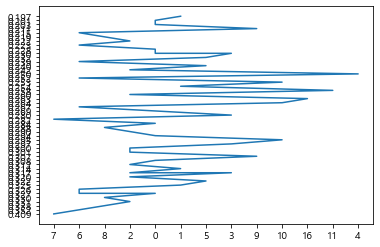

In [17]:
import matplotlib.pyplot as plt
plt.plot(data_df["홈런"],data_df['타율'])
plt.show

In [37]:
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

# 키와 몸무게 데이터 읽어 들이기 --- (※1)
tbl = pd.read_csv("ML/BMI/bmi.csv")

# 칼럼(열)을 자르고 정규화하기 --- (※2)
label = tbl["label"]
w = tbl["weight"] / 100 # 최대 100kg라고 가정
h = tbl["height"] / 200 # 최대 200cm라고 가정
wh = pd.concat([w, h], axis=1)

# 학습 전용 데이터와 테스트 전용 데이터로 나누기 --- (※3)
data_train, data_test, label_train, label_test = \
    train_test_split(wh, label)
    
# 데이터 학습하기 --- (※4)
clf = svm.SVC()
clf.fit(data_train, label_train)

# 데이터 예측하기 --- (※5)
predict = clf.predict(data_test)

# 결과 테스트하기 --- (※6)
ac_score = metrics.accuracy_score(label_test, predict)
cl_report = metrics.classification_report(label_test, predict)

print("정답률 =", ac_score)
print("리포트 =\n", cl_report)

정답률 = 0.9934
리포트 =
               precision    recall  f1-score   support

         fat       1.00      1.00      1.00      1934
      normal       0.98      0.99      0.99      1482
        thin       1.00      0.99      0.99      1584

    accuracy                           0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000



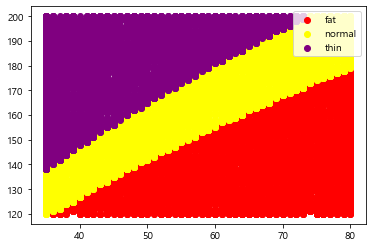

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

# Pandas로 CSV 파일 읽어 들이기
tbl = pd.read_csv("ML/BMI/bmi.csv", index_col=2)

# 그래프 그리기 시작
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# 서브 플롯 전용 - 지정한 레이블을 임의의 색으로 칠하기
def scatter(lbl, color):
    b = tbl.loc[lbl]
    ax.scatter(b["weight"],b["height"], c=color, label=lbl)
scatter("fat",    "red")
scatter("normal", "yellow")
scatter("thin",   "purple")
ax.legend() 

plt.show()

In [4]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_20newsgroups
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data
print('샘플의 수 :',len(documents))

documents[1]
print(dataset.target_names)

# 텍스트 전처리
news_df = pd.DataFrame({'document':documents})
# 특수 문자 제거
news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z]", " ")
# 길이가 3이하인 단어는 제거 (길이가 짧은 단어 제거)
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
# 전체 단어에 대한 소문자 변환
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: x.lower())

nltk.download('stopwords')

# NLTK로부터 불용어를 받아온다.
stop_words = stopwords.words('english')
tokenized_doc = news_df['clean_doc'].apply(lambda x: x.split()) # 토큰화
# 불용어를 제거합니다.
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])
print(tokenized_doc[1])

from gensim import corpora
dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]
print(corpus[1]) # 수행된 결과에서 두번째 뉴스 출력. 첫번째 문서의 인덱스는 0

# LDA 모델 훈련시키기
import gensim
NUM_TOPICS = 20 # 20개의 토픽, k=20
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)
    
### 3) LDA 시각화 하기
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

# 4) 문서 별 토픽 분포 보기
for i, topic_list in enumerate(ldamodel[corpus]):
    if i==5:
        break
    print(i,'번째 문서의 topic 비율은',topic_list)

샘플의 수 : 11314
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


C:\Users\user\AppData\Local\Temp\ipykernel_17068\3195797982.py:19: FutureWarning: The default value of regex will change from True to False in a future version.
  news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z]", " ")
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['yeah', 'expect', 'people', 'read', 'actually', 'accept', 'hard', 'atheism', 'need', 'little', 'leap', 'faith', 'jimmy', 'logic', 'runs', 'steam', 'sorry', 'pity', 'sorry', 'feelings', 'denial', 'faith', 'need', 'well', 'pretend', 'happily', 'ever', 'anyway', 'maybe', 'start', 'newsgroup', 'atheist', 'hard', 'bummin', 'much', 'forget', 'flintstone', 'chewables', 'bake', 'timmons']
[(52, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 2), (67, 1), (68, 1), (69, 1), (70, 1), (71, 2), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 2), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 2), (86, 1), (87, 1), (88, 1), (89, 1)]
(0, '0.014*"colorado" + 0.011*"exit" + 0.010*"exhaust" + 0.008*"static"')
(1, '0.018*"jews" + 0.012*"ground" + 0.010*"wire" + 0.009*"germany"')
(2, '0.014*"file" + 0.011*"available" + 0.009*"files" + 0.009*"program"')
(3, '0.020*"period" + 0.014*"power" + 0.013*"myers" + 0.012*"henrik"')
(

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)


0 번째 문서의 topic 비율은 [(1, 0.025536591), (4, 0.050582852), (6, 0.69316024), (11, 0.09064124), (12, 0.12776226)]
1 번째 문서의 topic 비율은 [(1, 0.027528772), (6, 0.41625208), (10, 0.05365776), (11, 0.34916058), (13, 0.033556174), (14, 0.03120582), (18, 0.07150921)]
2 번째 문서의 topic 비율은 [(6, 0.43767968), (9, 0.11631755), (11, 0.37614658), (12, 0.056899667)]
3 번째 문서의 topic 비율은 [(6, 0.09270934), (7, 0.3025405), (8, 0.027303582), (9, 0.16409867), (11, 0.32897684), (17, 0.040133193), (18, 0.03404218)]
4 번째 문서의 topic 비율은 [(11, 0.5685182), (15, 0.39812785)]


In [5]:
### 3) LDA 시각화 하기
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [34]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import tree

# 데이터 읽어 들이기
mr = pd.read_csv('ML/Mushroom/mushroom.csv',header=None)

# 데이터 내부의 기호를 숫자로 변환하기
label = []
data = []
attr_list = []
for row_index, row in mr.iterrows():
    label.append(ord(row.iloc[0]))
    row_data = []
    for v in row.iloc[1:]:
        row_data.append(ord(v))
    data.append(row_data)

# 학습 전용과 테스트 전용 데이터로 나누기
data_train, data_test, label_train, label_test = train_test_split(data, label)

clf = tree.DecisionTreeRegressor()
clf.fit(data_train,label_train)


DecisionTreeRegressor()